# Car Price prediction using Lasso-Linear Regression

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [5]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [10]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [11]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [16]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace = True)

df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace = True)



In [17]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [19]:
X = df.drop(['Car_Name','Selling_Price'],1)
Y = df['Selling_Price']

C:\Users\Akash.Kushwaha\AppData\Local\Temp\ipykernel_17160\1595783197.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop(['Car_Name','Selling_Price'],1)


In [21]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.1, random_state = 2)

In [22]:
x_train.shape, x_test.shape

((270, 7), (31, 7))

## Model building

In [42]:
model = LinearRegression()

In [24]:
model.fit(x_train,y_train)

LinearRegression()

In [26]:
#Model Evaluation

x_train_pred = model.predict(x_train)

In [33]:
r2_score(y_train,x_train_pred)

0.8799451660493701

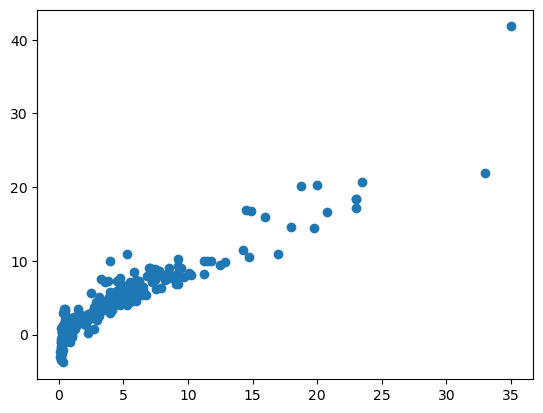

In [34]:
plt.scatter(y_train,x_train_pred)

In [36]:
#evaluation on test data

x_test_pred = model.predict(x_test)

In [37]:
r2_score(y_test,x_test_pred)

0.836576671502687

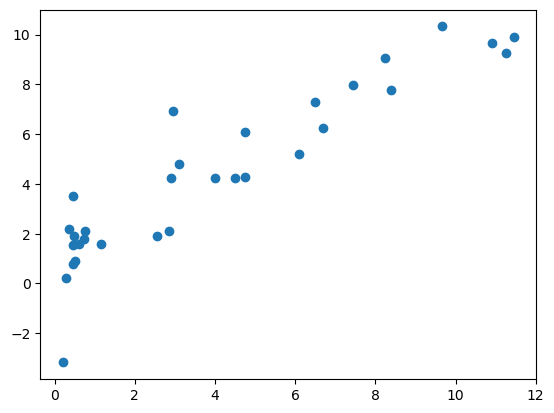

In [38]:
plt.scatter(y_test,x_test_pred)

In [39]:
x_test_pred

array([10.32892855,  0.77165673,  4.26482324,  4.78985002,  9.88701568,
        4.24823193,  6.92536953,  7.29321065,  0.21950514,  5.18527582,
        6.23823964,  6.07761019,  2.1716932 ,  7.77611973,  1.89987958,
        1.79635895,  2.10001123,  1.91953211,  9.24977006,  4.25291486,
        1.569912  ,  9.04949049,  1.52561157,  9.65418587,  0.89631315,
        7.99187626,  1.59929505, -3.17680912,  4.24653988,  2.1257015 ,
        3.49654935])

In [40]:
x_test.tail()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
141,2016,0.80,20000,0,1,0,0
192,2007,0.75,49000,0,1,0,1
216,2016,4.43,12500,0,0,0,0
3,2011,4.15,5200,0,0,0,0
159,2017,0.51,4000,0,1,1,0


In [41]:
y_test.tail()

141    0.60
192    0.20
216    2.90
3      2.85
159    0.45
Name: Selling_Price, dtype: float64

# Lasso Model

0.8427856123435794


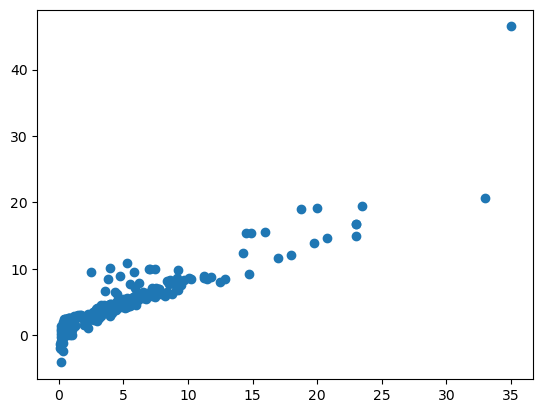

In [44]:
l_model = Lasso()
l_model.fit(x_train,y_train)
#Model Evaluation

x_train_pred = l_model.predict(x_train)
print(r2_score(y_train,x_train_pred))
plt.scatter(y_train,x_train_pred)

In [45]:
x_test_pred = l_model.predict(x_test)
r2_score(y_test,x_test_pred)

0.8709167941173195

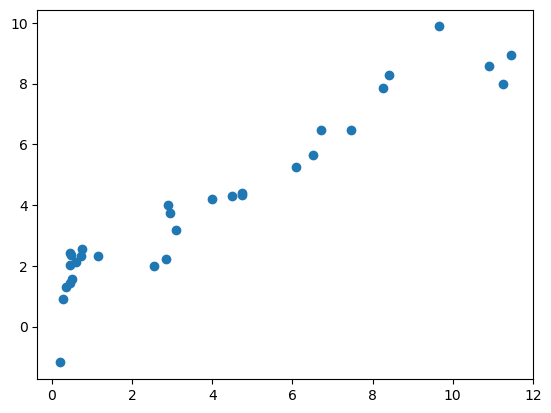

In [46]:
plt.scatter(y_test,x_test_pred)